In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("dataset.csv")

In [23]:
print(data.head())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296


In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


In [25]:
print(data.describe())

         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000


In [36]:
print("Статистика пропусков в колонках:")
for column_name, column_data in data.items():
    lenght = len(column_data)
    missed = column_data.isnull().sum()

    print(f"{column_name}: {(missed / lenght) * 100:.3f}%")

Статистика пропусков в колонках:
user_id: 0.000%
age: 4.878%
country: 0.000%
purchases: 0.000%
revenue: 0.000%


In [49]:
print("Статистика дубликатов:")
print(f"Кол-во рядов: {len(data)}. Процент повторяющихся: {data.duplicated().sum() / len(data) * 100:.3f}% ({data.duplicated().sum()} рядов)")

Статистика дубликатов:
Кол-во рядов: 41. Процент повторяющихся: 2.439% (1 рядов)


In [59]:
print("Аномалии в статистике:")
for index, row in data.iterrows():
    anomalies = []
    if  row["age"] > 100 or row["age"] < 18:
        anomalies.append("Странный возраст")

    if row["purchases"] < 0:
        anomalies.append("Кол-во пополнений иррационально")

    if row["purchases"] <= 0 and row["revenue"] > 0:
        anomalies.append("Наличие дохода при отсутствии пополнений")

    if len(anomalies) != 0:
        print(row.to_dict(), " ", ", ".join(anomalies))


    

Аномалии в статистике:
{'user_id': 6, 'age': 120.0, 'country': 'FR', 'purchases': -1, 'revenue': 785}   Странный возраст, Кол-во пополнений иррационально, Наличие дохода при отсутствии пополнений
{'user_id': 21, 'age': 5.0, 'country': 'RU', 'purchases': 8, 'revenue': 1488}   Странный возраст


In [59]:
print("Аномалии в статистике:")
for index, row in data.iterrows():
    anomalies = []
    if  row["age"] > 100 or row["age"] < 18:
        anomalies.append("Странный возраст")

    if row["purchases"] < 0:
        anomalies.append("Кол-во пополнений иррационально")

    if row["purchases"] <= 0 and row["revenue"] > 0:
        anomalies.append("Наличие дохода при отсутствии пополнений")

    if len(anomalies) != 0:
        print(row.to_dict(), " ", ", ".join(anomalies))


    

Аномалии в статистике:
{'user_id': 6, 'age': 120.0, 'country': 'FR', 'purchases': -1, 'revenue': 785}   Странный возраст, Кол-во пополнений иррационально, Наличие дохода при отсутствии пополнений
{'user_id': 21, 'age': 5.0, 'country': 'RU', 'purchases': 8, 'revenue': 1488}   Странный возраст


Приходим к выводу, что примерно 3% данных в датасете имеют аномалии в области возраста, количества пополнений и наличия дохода при отсутсвии пополнений

In [73]:
print(data["country"].value_counts())
print(data["age"].value_counts())

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
age
24.0     5
52.0     2
31.0     2
39.0     2
28.0     2
35.0     2
47.0     2
32.0     2
20.0     1
25.0     1
46.0     1
120.0    1
22.0     1
57.0     1
36.0     1
5.0      1
33.0     1
42.0     1
21.0     1
54.0     1
43.0     1
55.0     1
26.0     1
23.0     1
45.0     1
51.0     1
18.0     1
34.0     1
Name: count, dtype: int64


In [79]:
print(data.groupby(['country'])['revenue'].mean().sort_values())

country
US     557.375000
FR     675.916667
RU     790.076923
CN    1054.000000
DE    1445.500000
Name: revenue, dtype: float64


Выходит, наибольшие заработки в среднем в Германии

In [78]:
print(data.groupby(['age'])['purchases'].mean().sort_values())

age
120.0   -1.0
46.0     0.0
28.0     1.0
55.0     1.0
45.0     2.0
22.0     3.0
43.0     3.0
51.0     3.0
35.0     4.0
42.0     4.0
31.0     4.0
18.0     4.0
47.0     4.5
24.0     4.6
23.0     5.0
21.0     5.0
39.0     5.5
54.0     6.0
26.0     6.0
33.0     6.0
52.0     6.5
20.0     7.0
25.0     7.0
34.0     7.0
57.0     7.0
5.0      8.0
32.0     8.5
36.0     9.0
Name: purchases, dtype: float64


При том люди 36 лет активнее всего совершали пополнения

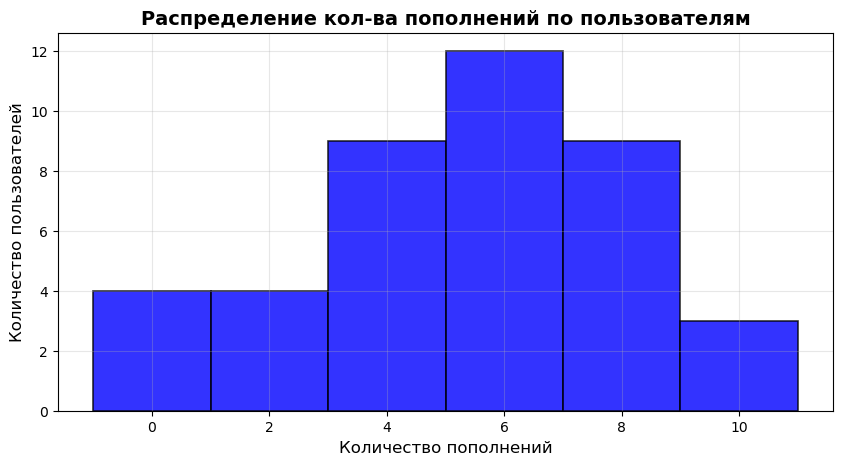

In [124]:
def sturges_rule(data): #рационально считаем кол-во "корзин"
    bins = int(1 + 3.322 * np.log10(len(data)))
    return bins

plt.figure(figsize=(10,6))
plt.subplots_adjust(bottom=0.25)
purchase_bins  = sturges_rule(data['purchases'])
plt.hist(data['purchases'], bins=purchase_bins, color='blue', alpha=0.8, linewidth=1.2, edgecolor='black')
plt.xlabel('Количество пополнений', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title(f'Распределение кол-ва пополнений по пользователям', 
          fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)

plt.savefig('figures/purchases_by_users.png')
plt.savefig('figures/purchases_by_users.svg')
plt.show()


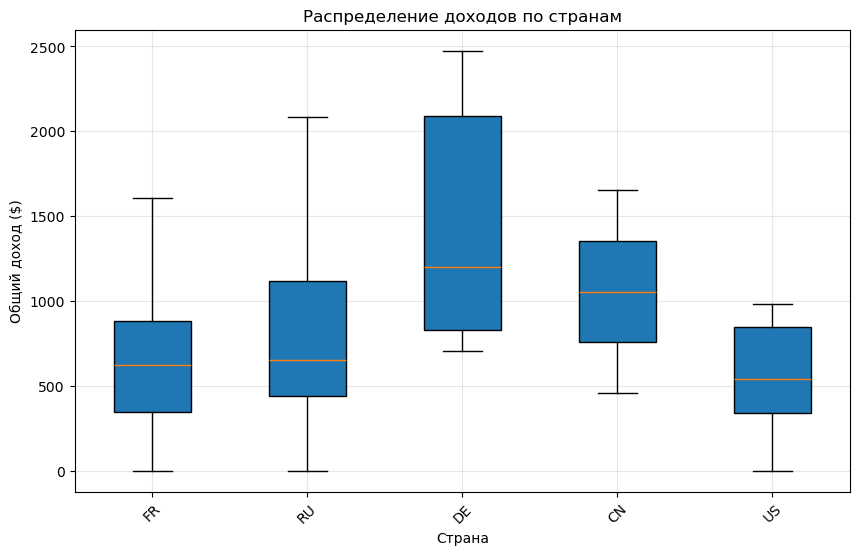

In [122]:
plt.figure(figsize=(10,6))
data_by_countries = [data[data['country'] == country]['revenue'] for country in data['country'].unique()]
plt.boxplot(data_by_countries, tick_labels=data['country'].unique(), patch_artist=True)
plt.title('Распределение доходов по странам')
plt.ylabel('Общий доход ($)')
plt.xlabel('Страна')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


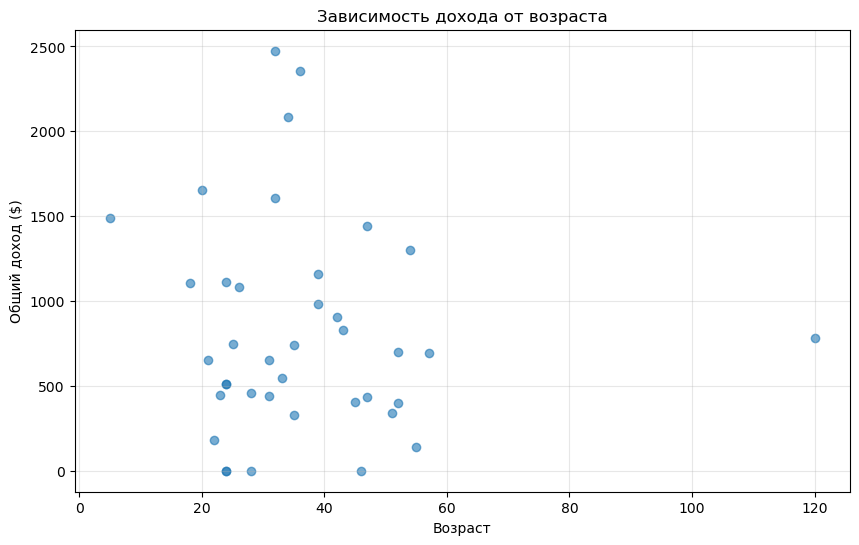

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['revenue'], alpha=0.6)
plt.xlabel('Возраст')
plt.ylabel('Общий доход ($)')
plt.title('Зависимость дохода от возраста')
plt.grid(True, alpha=0.3)
plt.show()